# Task 07 - Introduction to Discriminative Models - The Perceptron Algorithm
## Pattern Recognition and Machine Learning

In [52]:
%load_ext autoreload
%autoreload 2
# uncomment following for interactive matplotlib
# %matplotlib notebook

from perceptron import *
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1 - separable
#### choose data from following:

In [53]:
data = np.load("data_perceptron_separable.npz", allow_pickle=True)
X = data["X"]
y = data["y"]

# # Testing/Debugging data
# X = np.array([[1, 1], [3, 3], [4, 4], [2, 2], [5, 5]], dtype=np.float32).T
# y = np.array([0, 0, 0, 1, 1])

# # Testing/Debugging data
# X = np.array([[1, 0], [0, 1], [2, 1]], dtype=np.float32).T
# y = np.array([0, 0, 1])

#### Run the perceptron algorithm with at most 100 iterations

In [54]:
w, b = perceptron(X, y, 100)

if np.all(np.isnan(w)):
    print('The algorithm did not converge in given iteration limit.')

#### Visualise

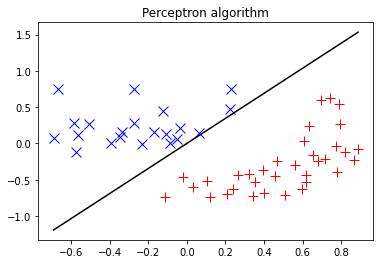

In [55]:
# Show the data and the resulting linear classifier
plt.figure()
plt.plot(X[0,y==0],X[1,y==0],'bx',ms=10)
plt.plot(X[0,y==1],X[1,y==1],'r+',ms=10)
x_bound =[np.min(X[0]), np.max(X[0])]
xs = np.linspace(x_bound[0], x_bound[1])
ys = -(xs*w[0] +b)/w[1]
plt.plot(xs,ys,'k-')
plt.title('Perceptron algorithm')
plt.savefig('perceptron_linear.png')

## Task 2 - unseparable

In [56]:
data = np.load("data_perceptron_unseparable.npz", allow_pickle=True)
X_un = data["X"]
y_un = data["y"]
print(X_un)
print(y_un)

[[-0.59615385 -0.49175824 -0.28846154  0.18406593  0.67307692  0.72802198
   0.65659341  0.38186813  0.17857143 -0.31593407 -0.59065934 -0.67857143
  -0.71703297 -0.65659341 -0.56318681 -0.21703297  0.02472527  0.49175824
   0.69505495  0.70054945  0.3489011  -0.23901099 -0.5467033  -0.42032967
  -0.28846154 -0.13461538  0.11263736  0.35989011  0.52472527  0.53021978
   0.41483516  0.19505495  0.03571429 -0.23901099 -0.28846154 -0.32692308
  -0.17307692  0.1456044   0.33241758  0.43681319  0.3543956   0.15659341
  -0.03571429 -0.06318681 -0.03571429  0.0521978   0.18956044  0.24450549
   0.15659341  0.07417582  0.22802198  0.71153846  0.39285714  0.87087912
   0.84340659  0.87087912  0.83791209  0.52472527 -0.01373626 -0.51373626
  -0.8543956  -0.83791209 -0.87637363 -0.78846154 -0.72252747 -0.51373626
  -0.40934066 -0.30494505 -0.10164835 -0.06868132  0.10714286  0.26648352
   0.59615385  0.60714286]
 [-0.25210084 -0.0952381   0.20168067  0.51540616  0.2745098  -0.08403361
  -0.532212

In [57]:
Z_un = lift_dimension(X_un)

# Run the perceptron algorithm with at most 100 iterations
w_un, b_un = perceptron(Z_un, y_un, 1000)

if np.all(np.isnan(w_un)):
    print('The algorithm did not converge in given iteration limit.')

#### Visualise

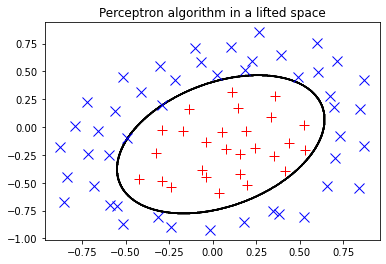

In [58]:
# Show the data and the resulting classifier
model = {'w': w_un, 'b': b_un}
pboundary(X_un, y_un, model)

plt.title('Perceptron algorithm in a lifted space')
plt.savefig('perceptron_quadratic.png')